In [244]:
from datetime import datetime
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import medfilt

from numpy.fft import fft

In [108]:
df = pd.read_parquet('../../data/wx/wwa01.parq')

In [335]:
def get_spectrums(arr):
    spectrum = fft(arr)
    magnitude = np.abs(spectrum)
    threshold = max(magnitude)/10000;
    spectrum[magnitude < threshold] = 0
    phase = np.angle(spectrum)

    return magnitude, phase

def phase_windows(arr, k):
    # length of the array
    n = len(arr)
 
    # n must be greater than k
    if n < k:
        print("Invalid")
        return -1
 
    # Compute sum of first window of size k
    window_phase = get_phase(arr[:k])
 
    fs = np.fft.fftfreq(k, d = 1/24)
    phases = []
    for i in range(n - k):
        window_mag, window_phase = get_spectrums(arr[i: i + k])
        threshold = max(window_mag)/100

        diurnal_phase = np.nanmean(window_phase[(fs > 0.6) & (fs < 1.4)])
        day_plus = np.nanmean(window_phase[(fs > 0.9)])

        large_phases = np.nanmean(window_phase[(window_mag > np.quantile(window_mag, 0.8)) & (fs > 0.6)])
        phases.append(large_phases)
 
    return phases

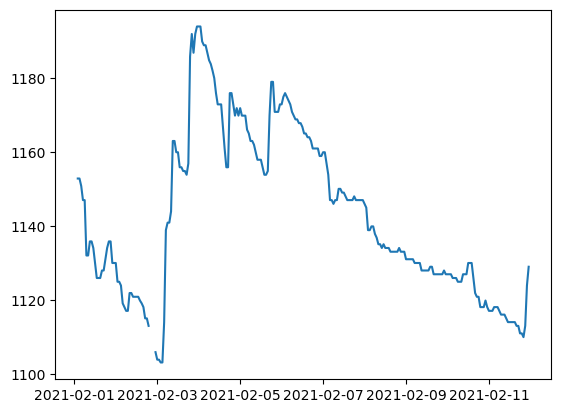

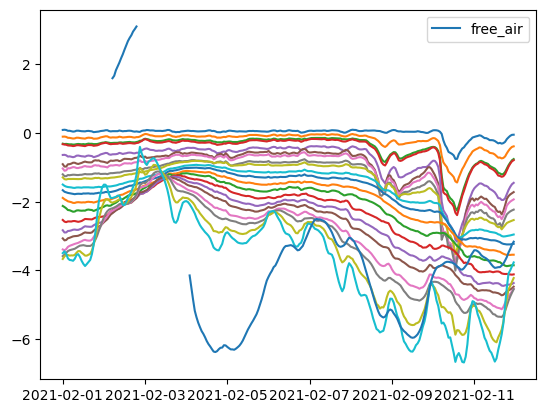

In [336]:
d1 = '2021-02-1'
d2 = '2021-02-11'

plt.plot(df.loc[d1: d2][f'snow_depth_set_1'].rolling(3).median())
plt.show()
for i in range(2, 22):
    plt.plot(df.loc[d1: d2][f'air_temp_set_{i}'], label = f'_air_temp_{i}')
plt.plot(df.loc[d1: d2][f'air_temp_set_1'].rolling(30).mean(), label = f'free_air')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


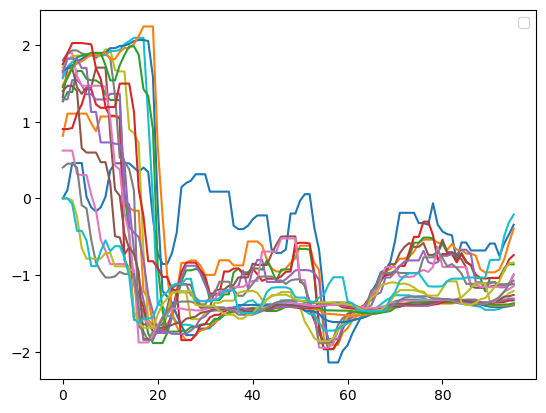

In [337]:
for i in range(2, 22):
    phases = phase_windows(df.loc[d1: d2][f'air_temp_set_{i}'], 24*7)
    phases = medfilt(phases, 5)
    # phases = np.unwrap(phases)
    plt.plot(phases)
    # plt.plot(phases - np.roll(phases, 1), label = f'air_temp_{i}')
plt.legend()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


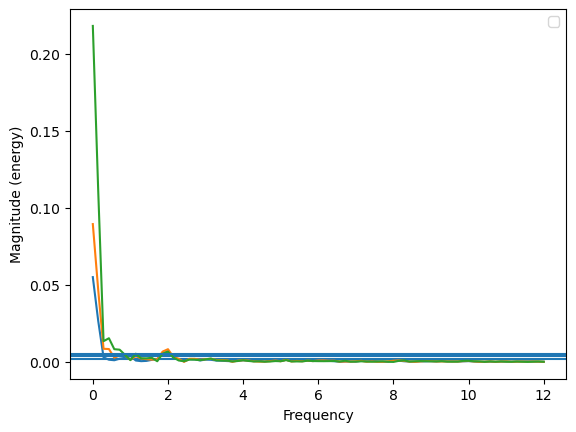

In [334]:
for i in range(2, 5):
    spectrum, fs, _ = plt.magnitude_spectrum(df.loc[d1: d2][f'air_temp_set_{i}'][:24*7], Fs = 24)
    plt.axhline(np.quantile(spectrum, 0.9))
    # phases = plt.amplitude_spectrum(np.fft.fft(df.loc[d1: d2][f'air_temp_set_{i}'][:24*7]))
    # phases = medfilt(phases, 5)
    # phases = np.unwrap(phases)
    # plt.plot(phases)
    # plt.plot(phases - np.roll(phases, 1), label = f'air_temp_{i}')
plt.legend()